In [1]:
xmin=-1.5
ymin=-1.0
xmax=0.5
ymax=1.0
resolution=300
xstep=(xmax-xmin)/resolution
ystep=(ymax-ymin)/resolution
xs=[(xmin+(xmax-xmin)*i/resolution) for i in range(resolution)]
ys=[(ymin+(ymax-ymin)*i/resolution) for i in range(resolution)]

Let's try using **numpy**

# NumPy

Numerical Python, NumPy, is a library that enables us to do much faster work with floating point data than ordinary python.

In [2]:
import numpy as np

## NumPy constructors

NumPy's core type is the `ndarray`, or N-Dimensional Array:

In [3]:
np.zeros([3,4,2])

array([[[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]]])

We rarely construct an ndarray directly:

In [4]:
np.ndarray([2,2,2],dtype='int')

array([[[-6917529027641081856, -6917529027641081856],
        [          4404674571,           4427832408]],

       [[          4427863464,           4427850368],
        [                   0,                    0]]])

We can convert any Python iterable into an `ndarray` with the `array` magic constructor:

In [5]:
x=np.array(xrange(5))
print x

[0 1 2 3 4]


But NumPy arrays can only contain one type of data, unlike Python lists, which is one source of their speed:

In [6]:
np.array([1,1.0,'one'])

array(['1', '1.0', 'one'], 
      dtype='|S32')

NumPy decided to make them all strings.

The real magic of numpy arrays is that most python operations are applied, quickly, on an elementwise basis:

In [7]:
x*2

array([0, 2, 4, 6, 8])

Ndarray multiplication is element wise, not matrix multiplication or vector dot product:

In [8]:
x*x

array([ 0,  1,  4,  9, 16])

Numpy's mathematical functions also happen this way, and are said to be "vectorized" functions.

In [9]:
np.sqrt(x)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ])

Numpy contains many useful functions for creating matrices. In our earlier lectures we've seen `linspace` and `arange` for evenly spaced numbers.

In [10]:
np.linspace(0,10,21)

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])

In [11]:
np.arange(0,10,0.5)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

 Here's one for creating matrices like coordinates in a grid:

In [12]:
xmin=-1.5
ymin=-1.0
xmax=0.5
ymax=1.0
resolution=300
xstep=(xmax-xmin)/resolution
ystep=(ymax-ymin)/resolution

ymatrix, xmatrix=np.mgrid[ymin:ymax:ystep,xmin:xmax:xstep]

In [13]:
print ymatrix

[[-1.         -1.         -1.         ..., -1.         -1.         -1.        ]
 [-0.99333333 -0.99333333 -0.99333333 ..., -0.99333333 -0.99333333
  -0.99333333]
 [-0.98666667 -0.98666667 -0.98666667 ..., -0.98666667 -0.98666667
  -0.98666667]
 ..., 
 [ 0.98        0.98        0.98       ...,  0.98        0.98        0.98      ]
 [ 0.98666667  0.98666667  0.98666667 ...,  0.98666667  0.98666667
   0.98666667]
 [ 0.99333333  0.99333333  0.99333333 ...,  0.99333333  0.99333333
   0.99333333]]


We can add these together to make a grid containing the complex numbers we want to test for membership in the Mandelbrot set.

In [14]:
values=xmatrix+1j*ymatrix

In [15]:
print values

[[-1.50000000-1.j         -1.49333333-1.j         -1.48666667-1.j         ...,
   0.48000000-1.j          0.48666667-1.j          0.49333333-1.j        ]
 [-1.50000000-0.99333333j -1.49333333-0.99333333j -1.48666667-0.99333333j
  ...,  0.48000000-0.99333333j  0.48666667-0.99333333j
   0.49333333-0.99333333j]
 [-1.50000000-0.98666667j -1.49333333-0.98666667j -1.48666667-0.98666667j
  ...,  0.48000000-0.98666667j  0.48666667-0.98666667j
   0.49333333-0.98666667j]
 ..., 
 [-1.50000000+0.98j       -1.49333333+0.98j       -1.48666667+0.98j       ...,
   0.48000000+0.98j        0.48666667+0.98j        0.49333333+0.98j      ]
 [-1.50000000+0.98666667j -1.49333333+0.98666667j -1.48666667+0.98666667j
  ...,  0.48000000+0.98666667j  0.48666667+0.98666667j
   0.49333333+0.98666667j]
 [-1.50000000+0.99333333j -1.49333333+0.99333333j -1.48666667+0.99333333j
  ...,  0.48000000+0.99333333j  0.48666667+0.99333333j
   0.49333333+0.99333333j]]


## Arraywise Algorithms

We can use this to apply the mandelbrot algorithm to whole *ARRAYS*

In [16]:
z0=values
z1=z0*z0+values
z2=z1*z1+values
z3=z2*z2+values

In [17]:
print z3

[[ 24.06640625+20.75j        23.16610231+20.97899073j
   22.27540349+21.18465854j ...,  11.20523832 -1.88650846j
   11.57345330 -1.6076251j   11.94394738 -1.31225596j]
 [ 23.82102149+19.85687829j  22.94415031+20.09504528j
   22.07634812+20.31020645j ...,  10.93323949 -1.5275283j
   11.28531994 -1.24641067j  11.63928527 -0.94911594j]
 [ 23.56689029+18.98729242j  22.71312709+19.23410533j
   21.86791017+19.4582314j  ...,  10.65905064 -1.18433756j
   10.99529965 -0.90137318j  11.33305161 -0.60254144j]
 ..., 
 [ 23.30453709-18.14090998j  22.47355537-18.39585192j
   21.65061048-18.62842771j ...,  10.38305264 +0.85663867j
   10.70377437 +0.57220289j  11.02562928 +0.27221042j]
 [ 23.56689029-18.98729242j  22.71312709-19.23410533j
   21.86791017-19.4582314j  ...,  10.65905064 +1.18433756j
   10.99529965 +0.90137318j  11.33305161 +0.60254144j]
 [ 23.82102149-19.85687829j  22.94415031-20.09504528j
   22.07634812-20.31020645j ...,  10.93323949 +1.5275283j
   11.28531994 +1.24641067j  11.63928527 +

So can we just apply our `mandel1` function to the whole matrix?

In [18]:
def mandel1(position,limit=50):
    value=position
    while abs(value)<2:
        limit-=1
        value=value**2+position
        if limit<0:
            return 0
    return limit

In [19]:
mandel1(values)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

No. The *logic* of our current routine would require stopping for some elements and not for others. 

We can ask numpy to **vectorise** our method for us:

In [20]:
mandel2=np.vectorize(mandel1)

In [21]:
data5=mandel2(values)

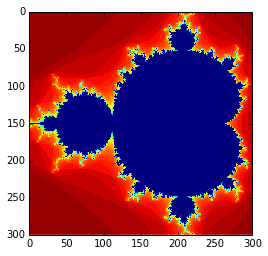

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(data5,interpolation='none')

Is that any faster?

In [23]:
%%timeit
data5=mandel2(values)

1 loops, best of 3: 641 ms per loop


This is not significantly faster. When we use *vectorize* it's just hiding an plain old python for loop under the hood. We want to make the loop over matrix elements take place in the "**C Layer**".

What if we just apply the Mandelbrot algorithm without checking for divergence until the end:

In [24]:
def mandel_numpy_explode(position,limit=50):
    value=position
    while limit>0:
        limit-=1
        value=value**2+position
        diverging=abs(value)>2

        
    return abs(value)<2

In [25]:
data6=mandel_numpy_explode(values)

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: overflow encountered in square
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in square
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: overflow encountered in absolute
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: RuntimeWarning: invalid value encountered in less


OK, we need to prevent it from running off to $\infty$

In [26]:
def mandel_numpy(position,limit=50):
    value=position
    while limit>0:
        limit-=1
        value=value**2+position
        diverging=abs(value)>2
        # Avoid overflow
        value[diverging]=2
        
    return abs(value)<2

In [27]:
data6=mandel_numpy(values)

In [28]:
%%timeit

data6=mandel_numpy(values)

10 loops, best of 3: 48.1 ms per loop


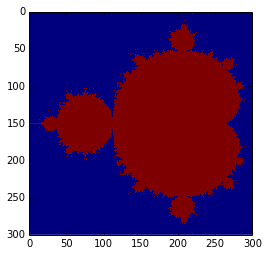

In [29]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(data6,interpolation='none')

Wow, that was TEN TIMES faster.

There's quite a few NumPy tricks there, let's look at them:

# Logical Arrays

In [30]:
diverging=abs(z3)>2
print diverging[30]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

When we apply a logical condition to a NumPy array, we get a logical array.

In [31]:
x=np.arange(10)*1.0
y=np.ones([10])*5
z=x>y
print z

[False False False False False False  True  True  True  True]


Logical arrays can be used to index into arrays:

In [32]:
x[x>80]

array([], dtype=float64)

In [33]:
x[np.logical_not(z)]

array([ 0.,  1.,  2.,  3.,  4.,  5.])

And you can use such an index as the target of an assignment:

In [34]:
x[z]=5
print x

[ 0.  1.  2.  3.  4.  5.  5.  5.  5.  5.]


## Broadcasting

In our example above, we didn't compare two arrays to get our logical array, but an array to a scalar integer.

When we apply an operation to things of different shapes, NumPy will **broadcast** the smaller index:

In [35]:
print x>5

[False False False False False False False False False False]


This can be used quite creatively:

In [36]:
row=np.array([[1,2,3]])
column=np.array([[0],[2],[4]])
print row.shape

(1, 3)


In [37]:
print column.shape

(3, 1)


In [38]:
row*column

array([[ 0,  0,  0],
       [ 2,  4,  6],
       [ 4,  8, 12]])

In [39]:
x=np.ones([4,1,2])
y=np.ones([1,4,1])
print (x+y).shape
print x+y

(4, 4, 2)
[[[ 2.  2.]
  [ 2.  2.]
  [ 2.  2.]
  [ 2.  2.]]

 [[ 2.  2.]
  [ 2.  2.]
  [ 2.  2.]
  [ 2.  2.]]

 [[ 2.  2.]
  [ 2.  2.]
  [ 2.  2.]
  [ 2.  2.]]

 [[ 2.  2.]
  [ 2.  2.]
  [ 2.  2.]
  [ 2.  2.]]]


## More Mandelbrot

Of course, we didn't calculate the number-of-iterations-to-diverge, just whether the point was in the set.

Let's correct our code to do that:


In [40]:
def mandel4(position,limit=50):
    value=position
    diverged_at_count=np.zeros(position.shape)
    while limit>0:
        limit-=1
        value=value**2+position
        diverging=abs(value)>2
        first_diverged_this_time=np.logical_and(diverging, 
                                                diverged_at_count==0)
        diverged_at_count[first_diverged_this_time]=limit
        value[diverging]=2
        
    return diverged_at_count

In [41]:
data7=mandel4(values)

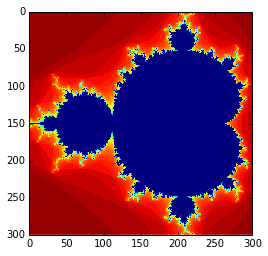

In [42]:
plt.imshow(data7,interpolation='none')

In [43]:
%%timeit

data7=mandel4(values)

10 loops, best of 3: 54.8 ms per loop


Note that here, all the looping over mandelbrot steps was in Python, but everything below the loop-over-positions happened in C. The code was amazingly quick compared to pure Python.

Can we do better by avoiding a square root?

In [44]:
def mandel5(position,limit=50):
    value=position
    diverged_at_count=np.zeros(position.shape)
    while limit>0:
        limit-=1
        value=value**2+position
        diverging=value*np.conj(value)>4
        first_diverged_this_time=np.logical_and(diverging, diverged_at_count==0)
        diverged_at_count[first_diverged_this_time]=limit
        value[diverging]=2
        
    return diverged_at_count

In [45]:
%%timeit

data8=mandel5(values)

10 loops, best of 3: 52.1 ms per loop


Probably not worth the time I spent thinking about it!

# NumPy Testing

Now, let's look at calculating those residuals, the differences between the different datasets.

In [46]:
data8=mandel5(values)
data5=mandel2(values)

In [47]:
np.sum((data8-data5)**2)

0.0

In [48]:
data1=[[mandel1(complex(x,y)) for x in xs] for y in ys]
sum(sum((data1-data7)**2))

0.0

But this doesn't work for pure non-numpy arrays

In [49]:
data2=[]
for y in ys:
    row=[]
    for x in xs:
        row.append(mandel1(complex(x,y)))
    data2.append(row)

In [50]:
data2-data1

TypeError: unsupported operand type(s) for -: 'list' and 'list'

So we have to convert to NumPy arrays explicitly:

In [ ]:
sum(sum((np.array(data2)-np.array(data1))**2))

NumPy provides some convenient assertions to help us write unit tests with NumPy arrays:

In [51]:
x = [1e-5, 1e-3, 1e-1]
y = np.arccos(np.cos(x))
np.testing.assert_allclose(x, y, rtol=1e-6, atol=1e-20)

In [52]:
np.testing.assert_allclose(data7, data1)

# Arraywise operations are fast

Note that we might worry that we carry on calculating the mandelbrot values for points that have already diverged.

In [53]:
def mandel6(position,limit=50):
    value=np.zeros(position.shape)+position
    calculating=np.ones(position.shape,dtype='bool')
    diverged_at_count=np.zeros(position.shape)
    while limit>0:
        limit-=1
        value[calculating]=value[calculating]**2+position[calculating]
        diverging_now=np.zeros(position.shape,dtype='bool')
        diverging_now[calculating]=value[calculating
                                         ]*np.conj(value[calculating])>4
        calculating=np.logical_and(calculating,
                                   np.logical_not(diverging_now))
        diverged_at_count[diverging_now]=limit

        
    return diverged_at_count

In [54]:
data8=mandel6(values)

In [55]:
%%timeit

data8=mandel6(values)

10 loops, best of 3: 52.1 ms per loop


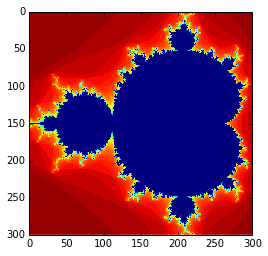

In [56]:
plt.imshow(data8,interpolation='none')

This was **not faster** even though it was **doing less work**

This often happens: on modern computers, **branches** (if statements, function calls) and **memory access** is usually the rate-determining step, not maths.

Complicating your logic to avoid calculations sometimes therefore slows you down. The only way to know is to **measure**

# Indexing with arrays

We've been using Boolean arrays a lot to get access to some elements of an array. We can also do this with integers:

In [57]:
x=np.arange(64)
y=x.reshape([8,8])
y

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [58]:
y[[0,5,2]]

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [59]:
y[[0,2,5],[1,2,7]]

array([ 1, 18, 47])

We can use a : to indicate we want all the values from a particular axis:

In [60]:
y[0:8:2,[0,2]]

array([[ 0,  2],
       [16, 18],
       [32, 34],
       [48, 50]])

We can mix array selectors, boolean selectors, :s and ordinary array seqeuencers:

In [61]:
z=x.reshape([4,4,4])
print z

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]
  [24 25 26 27]
  [28 29 30 31]]

 [[32 33 34 35]
  [36 37 38 39]
  [40 41 42 43]
  [44 45 46 47]]

 [[48 49 50 51]
  [52 53 54 55]
  [56 57 58 59]
  [60 61 62 63]]]


In [62]:
z[:,[1,3],0:3]

array([[[ 4,  5,  6],
        [12, 13, 14]],

       [[20, 21, 22],
        [28, 29, 30]],

       [[36, 37, 38],
        [44, 45, 46]],

       [[52, 53, 54],
        [60, 61, 62]]])

We can manipulate shapes by adding new indices in selectors with np.newaxis:

In [63]:
z[:,np.newaxis,[1,3],0].shape

(4, 1, 2)

When we use basic indexing with integers and : expressions, we get a **view** on the matrix so a copy is avoided:

In [66]:
a=z[:,:,2]
a[0,0]=-500
z

array([[[   0,    1, -500,    3],
        [   4,    5,    6,    7],
        [   8,    9,   10,   11],
        [  12,   13,   14,   15]],

       [[  16,   17,   18,   19],
        [  20,   21,   22,   23],
        [  24,   25,   26,   27],
        [  28,   29,   30,   31]],

       [[  32,   33,   34,   35],
        [  36,   37,   38,   39],
        [  40,   41,   42,   43],
        [  44,   45,   46,   47]],

       [[  48,   49,   50,   51],
        [  52,   53,   54,   55],
        [  56,   57,   58,   59],
        [  60,   61,   62,   63]]])

We can also use ... to specify ": for as many as possible intervening axes":

In [67]:
z[1]

array([[16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [68]:
z[...,2]

array([[-500,    6,   10,   14],
       [  18,   22,   26,   30],
       [  34,   38,   42,   46],
       [  50,   54,   58,   62]])

However, boolean mask indexing and array filter indexing always causes a copy.

Let's try again at avoiding doing unnecessary work by using new arrays containing the reduced data instead of a mask:

In [69]:
def mandel7(position,limit=50):
    positions=np.zeros(position.shape)+position
    value=np.zeros(position.shape)+position
    indices=np.mgrid[0:values.shape[0],0:values.shape[1]]
    diverged_at_count=np.zeros(position.shape)
    while limit>0:
        limit-=1
        value=value**2+positions
        diverging_now=value*np.conj(value)>4
        diverging_now_indices=indices[:,diverging_now]
        carry_on=np.logical_not(diverging_now)

        value=value[carry_on]
        indices=indices[:,carry_on]
        positions=positions[carry_on]
        diverged_at_count[diverging_now_indices[0,:],
                          diverging_now_indices[1,:]]=limit

    return diverged_at_count

In [70]:
data9=mandel7(values)

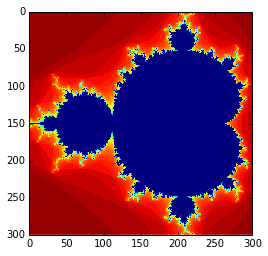

In [71]:
plt.imshow(data9,interpolation='none')

In [72]:
%%timeit

data9=mandel7(values)

10 loops, best of 3: 71.3 ms per loop


Still slower. Probably due to lots of copies.